In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, ttest_ind, levene, shapiro

Data loading

In [30]:
df = pd.read_excel('data_challenge.xlsx')
df.head()

,customer_id,country,segment,customer_since,date_newsletter_sent,first_databreach_usage,active_user_share,gdpr_country,arr_usd,premium_support_program,uses_translate_product,uses_ai_product
0,29,Germany,Corporation,2020-01-01,2023-01-15,2023-03-01,0.476,True,25269.58,False,False,True
1,3,UK,Law Firm,2022-12-31,2023-02-01,2023-03-21,0.477,False,74937.42,False,False,True
2,83,Australia,Corporation,2022-12-31,2023-01-15,2023-02-01,0.247,False,18733.01,False,False,True
3,106,UK,Corporation,2021-03-01,2023-01-15,NaT,0.703,False,48507.94,False,False,True
4,10,US,Law Firm,2022-07-31,2023-02-01,NaT,0.347,False,28126.01,False,False,False


In [31]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
customer_id,118.0,54.813559,1.0,27.25,55.5,81.75,110.0,32.173129
customer_since,118,2021-07-23 17:05:05.084745728,2020-01-01 00:00:00,2021-03-01 00:00:00,2021-03-01 00:00:00,2022-07-31 00:00:00,2022-12-31 00:00:00,NaN
date_newsletter_sent,118,2023-01-23 12:00:00,2023-01-15 00:00:00,2023-01-15 00:00:00,2023-01-23 12:00:00,2023-02-01 00:00:00,2023-02-01 00:00:00,NaN
first_databreach_usage,53,2023-03-10 17:12:27.169811200,2022-11-09 00:00:00,2023-01-30 00:00:00,2023-02-16 00:00:00,2023-03-08 00:00:00,2024-01-31 00:00:00,NaN
active_user_share,118.0,0.46878,0.102,0.30775,0.4715,0.61125,0.93,0.191468
arr_usd,118.0,27495.04661,4091.01,16539.83,22576.97,33988.9075,85545.05,17122.957739


In [32]:
df.shape[0]

118

Defining two groups

In [33]:
pilot_group = df[df['date_newsletter_sent'] == '2023-01-15']
print(pilot_group.shape[0])
non_pilot_group = df[df['date_newsletter_sent'] == '2023-02-01']
print(non_pilot_group.shape[0])

59
59


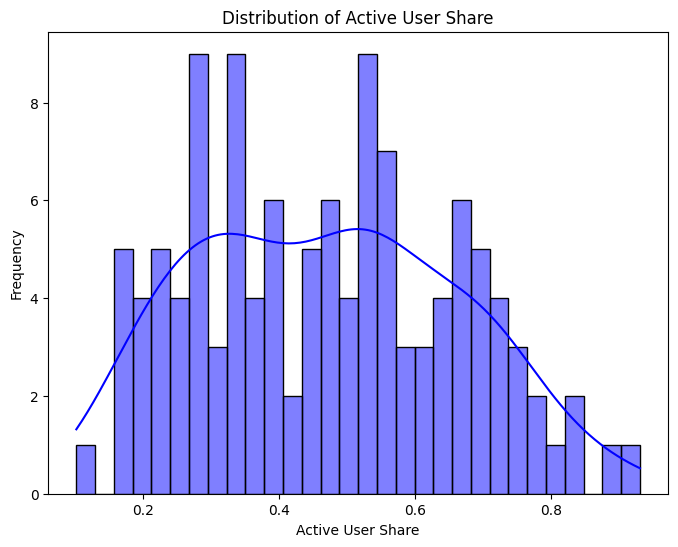

Skewness: 0.18807077227336969


In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['active_user_share'], kde=True, bins=30, color='blue')
plt.title("Distribution of Active User Share")
plt.xlabel("Active User Share")
plt.ylabel("Frequency")
plt.show()

skewness = skew(df['active_user_share'])
print(f"Skewness: {skewness}")

/var/folders/0t/g5p3lp7j739f033nsc__94br0000gn/T/ipykernel_91160/1846631645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='date_newsletter_sent', y='active_user_share', palette='coolwarm')


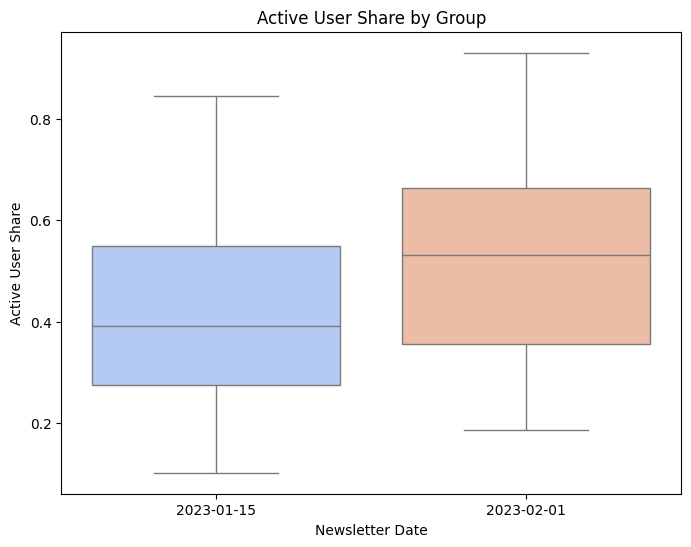

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='date_newsletter_sent', y='active_user_share', palette='coolwarm')
plt.title('Active User Share by Group')
plt.xlabel('Newsletter Date')
plt.ylabel('Active User Share')
plt.show()

In [36]:
pilot_active_user_share = pilot_group['active_user_share']
non_pilot_active_user_share = non_pilot_group['active_user_share']

stat, p_value = levene(pilot_active_user_share, non_pilot_active_user_share)
print(f"Levene's Test: Statistic={stat}, p-value={p_value}")

Levene's Test: Statistic=0.07668407592347606, p-value=0.7823352263903667


Variances are equal. Proceeding with standard t-test.

In [37]:
pilot_normality = shapiro(pilot_active_user_share)
non_pilot_normality = shapiro(non_pilot_active_user_share)

print(f"Pilot group normality test: Statistic={pilot_normality[0]}, p-value={pilot_normality[1]}")
print(f"Non-pilot group normality test: Statistic={non_pilot_normality[0]}, p-value={non_pilot_normality[1]}")

Pilot group normality test: Statistic=0.9607747157836252, p-value=0.054638759848962215
Non-pilot group normality test: Statistic=0.9759953201520658, p-value=0.29322476371099265


Data are approxamitely normally distributed

In [38]:
t_stat, p_value = ttest_ind(pilot_active_user_share, non_pilot_active_user_share, equal_var=True)
print(f"T-Test Statistic: {t_stat}, p-value: {p_value}")

T-Test Statistic: -3.1504145957887877, p-value: 0.0020743033222064074


Null Hypothesis (H_0): There is no difference in the mean active_user_share between the pilot and non-pilot groups.


Alternative Hypothesis (H_1): There is a difference in the mean active_user_share between the pilot and non-pilot groups.

## Other factors that can explain the difference.

In [39]:
df.columns

Index(['customer_id', 'country', 'segment', 'customer_since',
       'date_newsletter_sent', 'first_databreach_usage', 'active_user_share',
       'gdpr_country', 'arr_usd', 'premium_support_program',
       'uses_translate_product', 'uses_ai_product'],
      dtype='object')

In [40]:
# Select numerical columns for correlation analysis
numerical_columns = ['active_user_share', 'arr_usd', 'date_newsletter_sent']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                      active_user_share   arr_usd  date_newsletter_sent
active_user_share              1.000000 -0.084190              0.280745
arr_usd                       -0.084190  1.000000             -0.123086
date_newsletter_sent           0.280745 -0.123086              1.000000


There is a positive correlation (≈ 0.28) between the active_user_share and date_newsletter_sent. This means that customers who received the newsletter later (larger date_newsletter_sent value) tend to have higher active user shares, but the correlation is weak/moderate.

In [41]:
reference_date = pd.Timestamp('2023-01-01')

# Convert 'date_newsletter_sent' to numeric format (days since the reference date)
df['days_since_reference'] = (df['date_newsletter_sent'] - reference_date).dt.days

# Preview the new column
print(df[['date_newsletter_sent', 'days_since_reference']].head())

  date_newsletter_sent  days_since_reference
0           2023-01-15                    14
1           2023-02-01                    31
2           2023-01-15                    14
3           2023-01-15                    14
4           2023-02-01                    31


/var/folders/0t/g5p3lp7j739f033nsc__94br0000gn/T/ipykernel_91160/1521100942.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  newsletter_timing_analysis = df.groupby('newsletter_timing')['active_user_share'].mean()


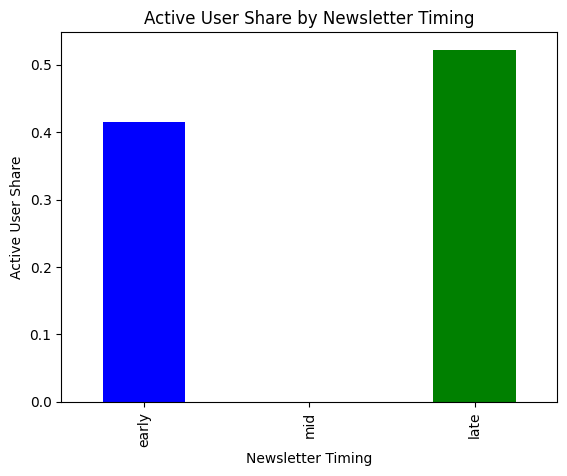

In [42]:
# Create bins for early, mid, and late newsletter timing
df['newsletter_timing'] = pd.cut(
    df['days_since_reference'], 
    bins=[-float('inf'), 15, 30, float('inf')],  # Early: <= 15 days, Mid: 16-30 days, Late: > 30 days
    labels=['early', 'mid', 'late']
)

# Calculate the average active_user_share for each group
newsletter_timing_analysis = df.groupby('newsletter_timing')['active_user_share'].mean()

newsletter_timing_analysis.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Active User Share by Newsletter Timing')
plt.xlabel('Newsletter Timing')
plt.ylabel('Active User Share')
plt.show()

In [43]:
# Create a new column for exact timing groups (15 days vs. 30 days)
df['newsletter_timing'] = df['days_since_reference'].map(lambda x: '15_days' if x == 15 else '30_days')
# Recalculate average active_user_share  
newsletter_timing_analysis = df.groupby('newsletter_timing')['active_user_share'].mean()
print(newsletter_timing_analysis)

newsletter_timing
30_days    0.46878
Name: active_user_share, dtype: float64


There are no active customers in the 15_days group

## Recommendations for the Marketing team

Higher engagement with newsletters sent later may indicate that customers need more time to evaluate and contextualize the product. Test different intervals (e.g., 20, 25, 30 days) and segment newsletters by customer groups.

Marketing decisions should be informed by ongoing performance metrics and customer feedback.

which customers are most likely to engage with the data breach product (or have higher active_user_share). 